# Machine Learning Essentials SS25 - Exercise Sheet 3

## Instructions
- `TODO`'s indicate where you need to complete the implementations.
- You may use external resources, but <b>write your own solutions</b>.
- Provide concise, but comprehensible comments to explain what your code does.
- Code that's unnecessarily extensive and/or not well commented will not be scored.

## Exercise 3

## Task 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Define network parameters
W1 = np.array([[8, -4],
               [-4, 8]])
b1 = np.array([-6, -6])
w2 = np.array([1, 1])
b2 = -0.5 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class XORNetwork:
    def __init__(self, W1, b1, w2, b2):
        self.W1 = W1
        self.b1 = b1
        self.w2 = w2
        self.b2 = b2

    # TODO: Implement the forward pass (& activation) of the two-layer network
    # Define sigmoid activation function
    def forward(self, x):
        """
        Forward pass through the network. Returns hidden layer activations and output.
        """
        z1 = self.W1 @ x + self.b1
        phi = sigmoid(z1)
        z2 = np.dot(self.w2, phi) + self.b2
        output = sigmoid(z2)
        return phi, output

### Task 3

Input: [0 0], Network Output: 0.379, True Output: 0
Input: [0 1], Network Output: 0.594, True Output: 1
Input: [1 0], Network Output: 0.594, True Output: 1
Input: [1 1], Network Output: 0.435, True Output: 0


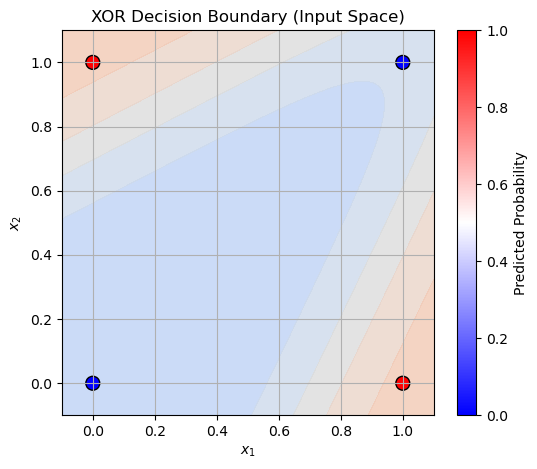

In [11]:
# TODO: Create XOR dataset, compute outputs & visualize decision boundary
net = XORNetwork(W1, b1, w2, b2)


inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
true_outputs = np.array([0, 1, 1, 0])


computed_outputs = []
hidden_activations = []

for x in inputs:
    phi, out = net.forward(x)
    computed_outputs.append(out)
    hidden_activations.append(phi)

computed_outputs = np.array(computed_outputs)
hidden_activations = np.array(hidden_activations)

for i, x in enumerate(inputs):
    print(f"Input: {x}, Network Output: {computed_outputs[i]:.3f}, True Output: {true_outputs[i]}")

x1_vals = np.linspace(-0.1, 1.1, 200)
x2_vals = np.linspace(-0.1, 1.1, 200)
xx1, xx2 = np.meshgrid(x1_vals, x2_vals)
grid = np.c_[xx1.ravel(), xx2.ravel()]

Z = np.array([net.forward(x)[1] for x in grid])
Z = Z.reshape(xx1.shape)

# Plot
plt.figure(figsize=(6, 5))
plt.contourf(xx1, xx2, Z, levels=np.linspace(0, 1, 20), cmap="coolwarm", alpha=0.8)
plt.scatter(inputs[:, 0], inputs[:, 1], c=true_outputs, cmap="bwr", edgecolors='k', s=100)
plt.title("XOR Decision Boundary (Input Space)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.colorbar(label="Predicted Probability")
plt.show()

### Task 5

Hidden Layer Activations (ϕ1, ϕ2) for XOR Inputs:
Input [0 0] → ϕ = [0.00247262 0.00247262]
Input [0 1] → ϕ = [4.53978687e-05 8.80797078e-01]
Input [1 0] → ϕ = [8.80797078e-01 4.53978687e-05]
Input [1 1] → ϕ = [0.11920292 0.11920292]


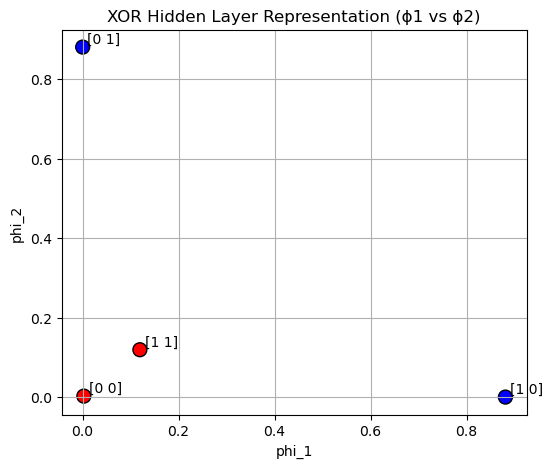

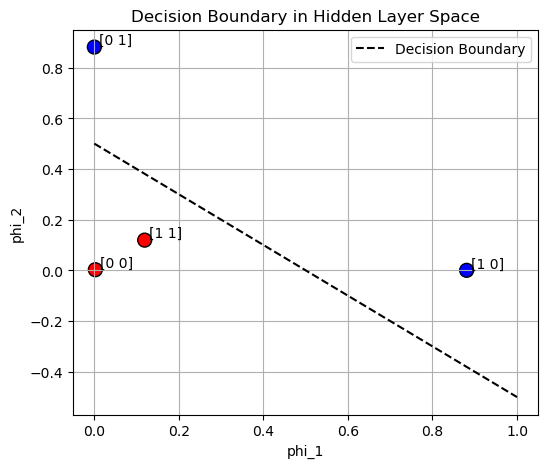

In [16]:
# TODO: (a) Compute hidden layer activations
hidden_activations = []

for x in inputs:
    phi, _ = net.forward(x)
    hidden_activations.append(phi)

hidden_activations = np.array(hidden_activations)
print("Hidden Layer Activations (ϕ1, ϕ2) for XOR Inputs:")
for i, phi in enumerate(hidden_activations):
    print(f"Input {inputs[i]} → ϕ = {phi}")

# TODO: (b) Create scatter plot in the (phi1, phi2) plane, coloring points by their label
plt.figure(figsize=(6, 5))
colors = ['red' if y == 0 else 'blue' for y in true_outputs]

plt.scatter(hidden_activations[:, 0], hidden_activations[:, 1], 
            c=colors, edgecolors='k', s=100)

for i, txt in enumerate(inputs):
    plt.annotate(f"{txt}", (hidden_activations[i, 0] + 0.01, hidden_activations[i, 1] + 0.01))

plt.xlabel("phi_1")
plt.ylabel("phi_2")
plt.title("XOR Hidden Layer Representation (ϕ1 vs ϕ2)")
plt.grid(True)
plt.show()

# TODO: (c) Draw the output layer's decision boundary in the (phi1, phi2) space
plt.figure(figsize=(6, 5))
plt.scatter(hidden_activations[:, 0], hidden_activations[:, 1], 
            c=colors, edgecolors='k', s=100)

# Add labels
for i, txt in enumerate(inputs):
    plt.annotate(f"{txt}", (hidden_activations[i, 0] + 0.01, hidden_activations[i, 1] + 0.01))

# Decision boundary: ϕ1 + ϕ2 = 0.5
x_vals = np.linspace(0, 1, 100)
y_vals = 0.5 - x_vals
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

plt.xlabel("phi_1")
plt.ylabel("phi_2")
plt.title("Decision Boundary in Hidden Layer Space")
plt.grid(True)
plt.legend()
plt.show()

<b>TODO</b>: (d) Briefly discuss the result

The original 2D space is not linearly seperable, but after the non linear transformation using the sigmoid function the points become linearly separable, which can be seen using the visualization.
Each hidden neuron calculates a weighted sum based on the inputs and then applies the sigmoid function